## 1. Introduction to NLP feature engineering
In this course, you will learn to extract useful features out of text and convert them into formats that are suitable for machine learning algorithms.
### 1.1. Theory.
#### Numerical data
For any ML algorithm, data fed into it must be in tabular form and all the training features must be numerical.

Consider the `Iris dataset`. Every training instance has exactly four numerical features. 

The ML algorithm uses these four features to train and predict if an instance belongs to class `iris-virginica`, `iris-setosa` or `iris-versicolor`.

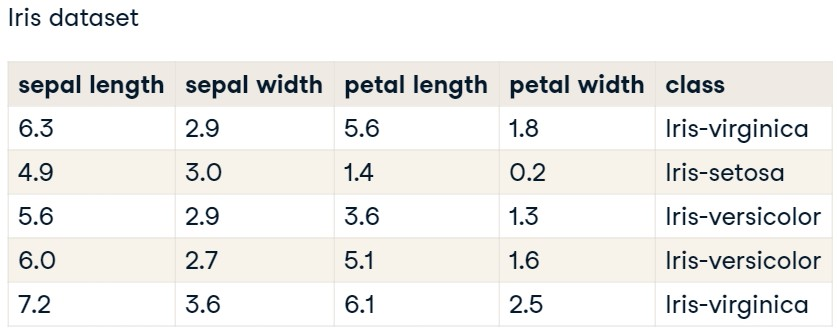

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### One-hot encoding
`ML algorithms` can also work with categorical data provided they are converted into numerical form through `one-hot encoding`. 

Let's say you have a categorical feature `'sex'` with two categories `'male'` and `'female'`.

One-hot encoding will convert this feature into two features, `'sex_male'` and `'sex_female'` such that each male instance has a `'sex_male'` value of `1` and `'sex_female'` value of `0`. For `females`, it is the `vice versa`.

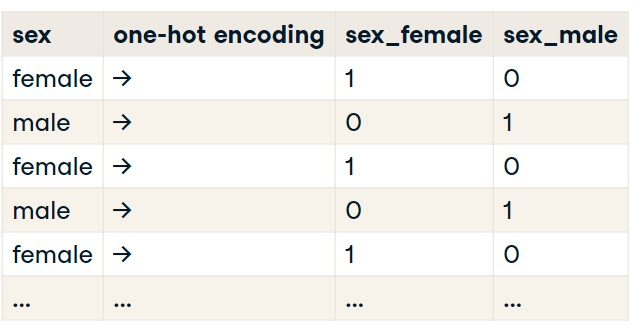

In [2]:
## Hình minh họa Image(fig1, height, width)

#### One-hot encoding with pandas
To do this in code, we use pandas' get_dummies() function. Let's import pandas using the alias `pd`. We can then pass our dataframe df into the `pd.get_dummies()` function and pass a list of features to be encoded as the columns argument. 

Not mentioning columns will lead pandas to automatically encode all **non-numerical features**. 

Finally, we overwrite the original dataframe with the encoded version by assigning the dataframe returned by `get_dummies()` back to `df`.

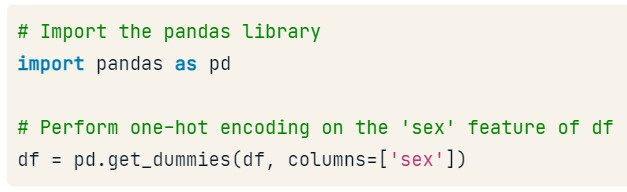

In [3]:
## Hình minh họa Image(fig1, height, width)

#### Textual data
Consider a movie reviews dataset. This data cannot be utilized by any machine learning or ML algorithm. The training feature 'review' isn't numerical. Neither is it categorical to perform one-hot encoding on.

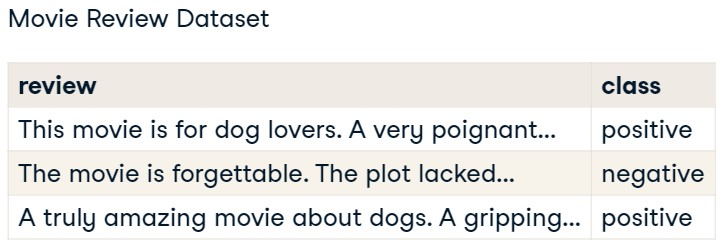

In [4]:
## Hình minh họa Image(fig1, height, width)

#### Text pre-processing
We need to perform two steps to make this dataset suitable for ML. 

- The first is to standardize the text. 
- This involves steps like converting words to lowercase and their base form. 

For instance, `'Reduction'` gets `lowercased` and then converted to its base form, reduce. We will cover these concepts in more detail in subsequent lessons.
#### ectorization
After preprocessing, the reviews are converted into a set of numerical training features through a process known as vectorization. After vectorization, our original review dataset gets converted into something like this. We will learn techniques to achieve this in later lessons.

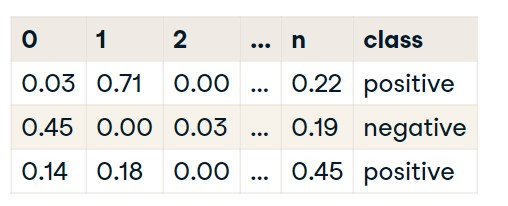

In [5]:
## Hình minh họa Image(fig1, height, width)

#### Basic features
We can also extract certain basic features from text. It maybe useful to know the word count, character count and average word length of a particular text.

While working with niche data such as tweets, it also maybe useful to know how many hashtags have been used in a tweet. 

This tweet by Silverado Records,for instance, uses two.

#### POS tagging
So far, we have seen how to extract features out of an entire body of text. Some NLP applications may require you to extract features for individual words. 
- For instance, you may want to do parts-of-speech tagging to know the different parts-of-speech present in your text as shown.
- As an example, consider the sentence 'I have a dog'. POS tagging will label each word with its corresponding part-of-speech.

| Word | I | have | a | dog |
|-|-|-|-|-|
| POS | Pronoun | Verb | article | noun |

#### Named Entity Recognition
You may also want to know perform named entity recognition to find out if a particular noun is referring to a person, organization or country. For instance, consider the sentence `"Brian works at DataCamp"`. 

Here, there are two nouns `"Brian"` and `"DataCamp"`. 

Brian refers to a `person` whereas DataCamp refers to an `organization`.

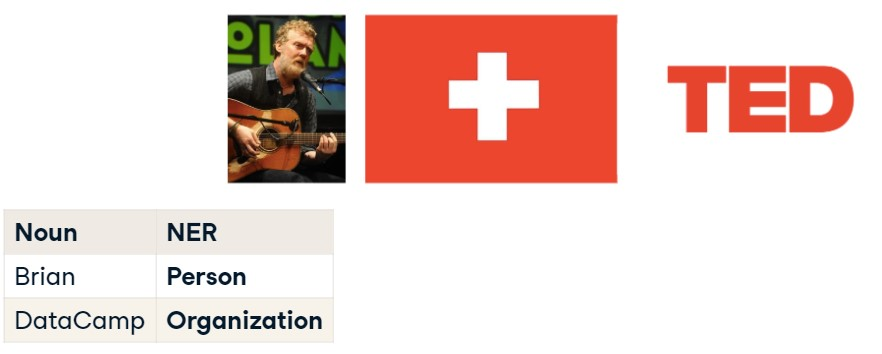

In [6]:
## Hình minh họa Image(fig1, height, width)

#### Concepts covered
Therefore, broadly speaking, this course will teach you how to conduct 
- text preprocessing, 
- extract certain basic features, word features and
- convert documents into a set of numerical features (using a process known as vectorization).

### 1.2. PRACTICES
#### Exercise 1.2.1. Data format for ML algorithms
In this exercise, you have been given four dataframes `df1`, `df2`, `df3` and `df4`. The final column of each dataframe is the predictor variable and the rest of the columns are training features.

Using the console, **determine which dataframe is in a suitable format to be trained by a classifier**.
#### Answers
- Viewing dataset

            In [1]: df1.head()
            Out[1]:

               feature 1  feature 2  feature 3  feature 4 feature 5  label
            0    29.0000          0          0   211.3375    female      1
            1     0.9167          1          2   151.5500      male      1
            2     2.0000          1          2   151.5500    female      0
            3    30.0000          1          2   151.5500      male      0
            4    25.0000          1          2   151.5500    female      0
            
            In [2]: df2.head()
            Out[2]:

               feature 1  feature 2  feature 3  feature 4  feature 5     label
            0  -1.745293  -0.837162  -0.885481  -0.190082  -0.111161 -2.835741
            1  -1.113249  -1.101384   1.132069   0.361661  -0.265301 -0.320568
            2   0.055839   1.207450  -0.899675   0.933430   0.382975 -0.713869
            3   0.816374   0.698360   0.497912  -0.298097  -0.196820 -1.832008
            4  -0.785005   0.745289  -1.212070   0.291087   1.334375  0.848035
            
            In [3]: df3.head()
            Out[3]:

               feature 1  feature 2  feature 3  feature 4  feature 5  label
            0          1         85         66         29          0      0
            1          8        183         64          0          0      1
            2          1         89         66         23         94      0
            3          0        137         40         35        168      1
            4          5        116         74          0          0      0
            
            In [4]: df4.head()
            Out[4]:

                                                       feature 1  label
            0  Led by Woody, Andy's toys live happily in his ...      1
            1  When siblings Judy and Peter discover an encha...      0
            2  A family wedding reignites the ancient feud be...      1
            3  Cheated on, mistreated and stepped on, the wom...      1
            4  Just when George Banks has recovered from his ...      0
            
- So,          
>- `df1` contains a feature (`5`) that is `not numerical`, so incorrect!
>- `df2` has all the features are numerical, the predictor variable is continuous. This makes it **suitable for applying a regression algorithm but not classification**.
>- `df3` has numerical training features and the predictor variable is a class. **Therefore, it is in a suitable format for applying a classification algorithm.**
>- `df4` is not the correct answer. **Classification algorithms cannot be applied to textual data in its raw form**.

#### Exercise 1.2.2. One-hot encoding
In the previous exercise, we encountered a dataframe df1 which contained categorical features and therefore, was unsuitable for applying ML algorithms to.

In this exercise, your task is to convert `df1` into a format that is suitable for machine learning.

In [7]:
import numpy as np
import pandas as pd

print(df1.head())

# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())

  feature 1 feature 2 feature 3 feature 4 feature 5 label
0   29.0000         0         0  211.3375    female     1
1    0.9167         1         2  151.5500      male     1
2    2.0000         1         2  151.5500    female     0
3   30.0000         1         2  151.5500      male     0
4   25.0000         1         2  151.5500    female     0
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')
  feature 1 feature 2 feature 3 feature 4 label  feature 5_female  \
0   29.0000         0         0  211.3375     1                 1   
1    0.9167         1         2  151.5500     1                 0   
2    2.0000         1         2  151.5500     0                 1   
3   30.0000         1         2  151.5500     0                 0   
4   25.0000         1         2  151.5500     0             

**Comments**
- Notice how the feature 5 (which represents sex) gets converted to two features `feature 5_male` and `feature 5_female`. 
- With `one-hot encoding` performed, df1 only contains numerical features and can now be fed into any standard ML model1

## 2. Basic feature extraction
### 2.1. Theory.
#### Number of characters
The most basic feature we can extract from text is the number of characters, including whitespaces. 

For instance, the string `"I don't know."` has 13 characters. The number of characters is the length of the string. `Python` gives us a built-in `len()` function which returns the length of the string passed into it. 

In [8]:
text = "I don't know"
num_chars = len(text)
print(num_chars)

12


The output will be 13 here too. If our dataframe df has a textual feature (say `'review'`), we can compute the number of characters for each review and store it as a new feature `'num_chars'` by using the pandas dataframe apply method. 

This is done by creating `df['num_chars']` and assigning it to `df['review'].apply(len)`.

In [9]:
import pandas as pd
df = pd.read_csv(r'../input/nlp-fe-datasets/movie_reviews_clean.csv')
df['num_chars'] = df['review'].apply(len)
df.head()

,review,sentiment,num_chars
0,this anime series starts out great interesting...,0,774
1,some may go for a film like this but i most as...,0,749
2,i ve seen this piece of perfection during the ...,1,879
3,this movie is likely the worst movie i ve ever...,0,583
4,it ll soon be 10 yrs since this movie was rele...,1,417


#### Number of words
Another feature we can compute is the `number of words`. 

- Assuming that every word is separated by a space, we can use a string's `split()` method to convert it into a list where every element is a word. 
- In this example, the string `Mary` had a little `lamb` is split to create a list containing the words Mary, had, a, little and `lamb`. We can now compute the number of words by computing the number of elements in this list using `len()`.

In [10]:
text = "Mary has a little lamb"
words = text.split()
print(words)
print(len(words))

['Mary', 'has', 'a', 'little', 'lamb']
5


To do this for a textual feature in a dataframe, we first define a function that takes in a string as an argument and returns the number of words in it. The steps followed inside the function are similar as before. We then pass this function `word_count` into apply. 

We create `df['num_words']` and assign it to `df['review'].apply(word_count)`.

In [11]:
def word_count(string):
    """Split the string into words and calculate its length"""
    words = string.split()
    return len(words)
df['num_words'] = df['review'].apply(word_count)
df.head()

,review,sentiment,num_chars,num_words
0,this anime series starts out great interesting...,0,774,130
1,some may go for a film like this but i most as...,0,749,138
2,i ve seen this piece of perfection during the ...,1,879,184
3,this movie is likely the worst movie i ve ever...,0,583,111
4,it ll soon be 10 yrs since this movie was rele...,1,417,90


#### Average word length
We can now pass this into `apply()` to generate a average word length feature like before.

In [12]:
def avg_word_len(string):
    words = string.split()
    w_len = [len(w) for w in words]
    avg_w_len = sum(w_len) / len(words)
    return avg_w_len

df['avg_word_length'] = df['review'].apply(avg_word_len)
df.head()

,review,sentiment,num_chars,num_words,avg_word_length
0,this anime series starts out great interesting...,0,774,130,4.953846
1,some may go for a film like this but i most as...,0,749,138,4.427536
2,i ve seen this piece of perfection during the ...,1,879,184,3.782609
3,this movie is likely the worst movie i ve ever...,0,583,111,4.252252
4,it ll soon be 10 yrs since this movie was rele...,1,417,90,3.644444


#### Special features
When working with data such as tweets, it maybe useful to compute the number of hashtags or mentions used. 

This tweet by DataCamp, for instance, has one mention `upendra_35` which begins with an `@` and two `hashtags`, `PySpark` and `Spark` which begin with a `#`.

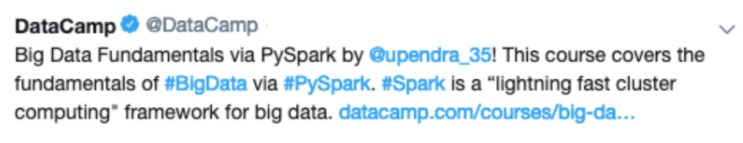

In [13]:
## Hình minh họa Image(fig1, height, width)

#### Hashtags and mentions
Let's write a function that computes the number of hashtags in a string. 
- We split the string into words.
- We then use list comprehension to create a list containing only those words that are hashtags. We do this using the startswith method of strings to find out if a word begins with `#`. 
- The final step is to return the number of elements in this list using len. 

Let's see this function in action. When we pass a string `"@janedoe This is my first tweet! #FirstTweet #Happy"`, the function returns 2 which is indeed the number of `hashtags` in the string.

In [14]:
def count_hashtags(string):
    words = string.split()
    hashtag = [word for word in words if word.startswith('#')]
    return len(hashtag)

your_text = "@janedoe This is my first tweet! #FirstTweet #Happy"
print(count_hashtags(your_text))

2


Likewise, the procedure to compute number of mentions is identical except that we check if a word starts with `@`. 

In [15]:
def count_mention(string):
    words = string.split()
    tagged = [word for word in words if word.startswith('@')]
    return len(tagged)

print(count_mention(your_text))

1


#### Other features
There are other basic features we can compute such as number of sentences, number of paragraphs, number of words starting with an 
- `uppercase`, 
- `all-capital words`, 
- `numeric quantities`
- `etc`. 

The procedure to do this is extremely similar to the ones we've already covered.

### 2.2. PRACTICES
#### Exercise 2.2.1. Character count of Russian tweets
In this exercise, you have been given a dataframe tweets which contains some tweets associated with Russia's Internet Research Agency and compiled by `FiveThirtyEight`.

In [16]:
tweets = pd.read_csv(r"../input/nlp-fe-datasets/russian_tweets.csv", 
                     usecols = ['content'])
tweets.head(3)

,content
0,LIVE STREAM VIDEO=> Donald Trump Rallies in Co...
1,Muslim Attacks NYPD Cops with Meat Cleaver. Me...
2,.@vfpatlas well that's a swella word there (di...


Your task is to create a new feature `'char_count'` in tweets which computes the number of characters for each tweet. 

Also, compute the average length of each tweet. The tweets are available in the content feature of tweets.
#### SOLUTION.

In [17]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


**Comments.**

Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. 

Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! 

Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.

#### Exercise 2.2.2. Word count of TED talks
`ted` is a dataframe that contains the transcripts of 500 `TED` talks.

Your job is to compute a new feature word_count which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the transcript feature in `ted`.

In [18]:
ted = pd.read_csv(r"../input/nlp-fe-datasets/ted.csv", 
                     usecols = ['transcript'])
ted.head(3)

,transcript
0,"We're going to talk — my — a new lecture, just..."
1,"This is a representation of your brain, and yo..."
2,It's a great honor today to share with you The...


In order to complete this task, you will need to define a function `count_words` that takes in a string as an argument and returns the number of words in the string. 

You will then need to apply this function to the transcript feature of ted to create the new feature `word_count` and compute its `mean`.
#### SOLUTION.

In [19]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


**Comments.**

Notice that the average length of a talk is close to 2000 words. You can use the `word_count` feature to compute its correlation with other variables such as number of `views`, number of `comments`, `etc`. and derive extremely interesting insights about `TED`.

#### Exercise 2.2.3. Hashtags and mentions in Russian tweets
Let's revisit the tweets dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions `count_hashtags()` and `count_mentions()` respectively and applying them to the content feature of `tweets`.

In case you don't recall, the tweets are contained in the content feature of `tweets`.
#### Question 1.
By the list comprehension, use `startswith()` to check if a particular word starts with `'#'`.

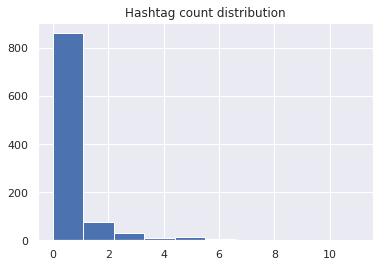

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Function that returns numner of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

**Question 2.** By the list comprehension, use `startswith()` to check if a particular word starts with `'@'`.

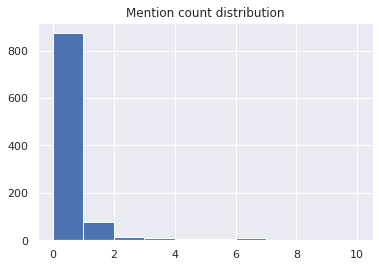

In [21]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

## 3. Readability tests
### 3.1. Theory.
#### Overview of readability tests
- These tests are used to **determine the readability** of a particular passage. In other words, it indicates at what educational level a person needs to be in, in order to comprehend a particular piece of text. 
- The **scale** usually **ranges from primary school up to college graduate level** and is in context of the American education system. 
- Readability tests are done using a **mathematical formula that utilizes** the `word`, `syllable` and `sentence` count of the passage. 

They are routinely used by organizations to determine how easy their publications are to understand. They have also found applications in domains such as `fake news` and opinion `spam detection`.

#### Readability text examples
There are a variety of readability tests in use. Some of the common ones include the 
- **Flesch reading ease**, 
- the **Gunning fog index**, 
- the **simple measure** of `gobbledygook` or SMOG and 
- the **Dale-Chall score**. 

Note that these tests are used for texts in English. Tests for other languages also exist that that take into consideration, the nuances of that particular language. 

For the sake of brevity, we will cover only the first two scores in detail. However, once you understand them, you will be in a good position to understand and use the other scores too.

#### 1) Flesch reading ease
- The `Flesch Reading Ease` is **one of the oldest and most widely** used readability tests. 
- The score is **based on two ideas**: 
>- The first is that **the greater the average sentence length, harder the text is to read**. Consider these two sentences. 

        "This is a short sentence"
        "This is longer sentence with more words and it is harder to follow than the first sentence"
>>> The first sentence is easier to follow than the second one. 

>- The second is that the **greater the average number of syllables in a word, the harder the text is to read**. 

>>> Therefore, the sentenece `"I live in my home"` is considered easier to read than `"I reside in my domicile"` on account of its usage of lesser syllables per word. 

- **The higher the Flesch Reading Ease score, the greater is the readability**. 

Therefore, a higher score indicates that the text is easier to understand.

#### Flesch reading ease score interpretation
This `table` shows how to interpret the Flesch Reading Ease scores. 

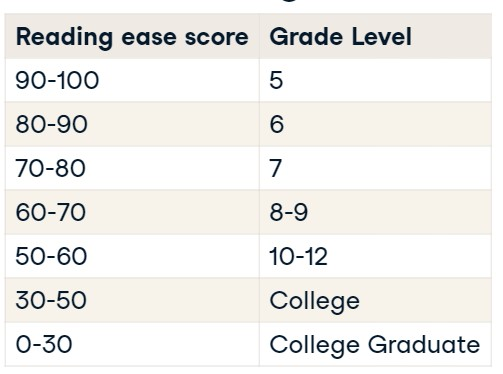

In [22]:
## Hình minh họa Image(fig1, height, width)

A score above 90 would imply that the text is comprehensible to a 5th grader whereas a score below 30 would imply the text can only be understood by college graduates.

#### 2) Gunning fog index
- The Gunning fog index was developed in 1954. 
- Like Flesch, this score is **also dependent on the average sentence length**.
- However, it uses percentage of complex words in place of average syllables per word to compute its score. Here, complex words refer to all words that have three or more syllables. 
- Unlike Flesch, the formula for Gunning fog index is such that **the higher the score ,the more difficult the passage is to understand**.

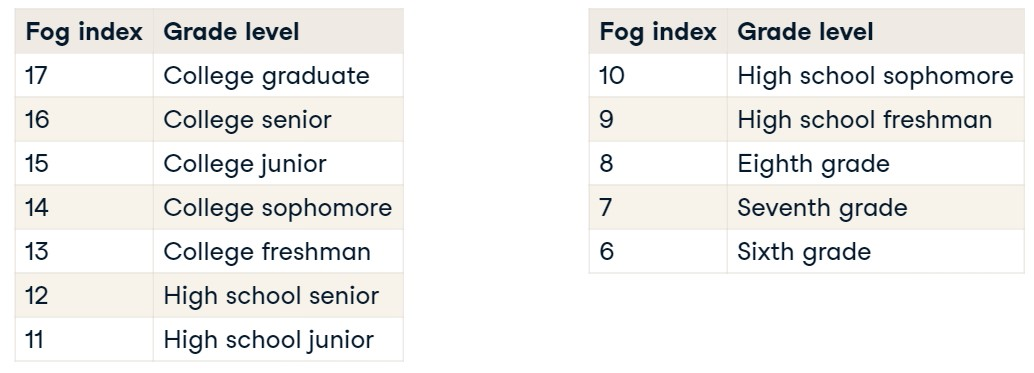

In [23]:
## Hình minh họa Image(fig1, height, width)

#### The textatistic library
**Installation.** `!pip install textatistic`

- We can conduct these readability tests in Python using the `Textatistic library`. 
- We `import` the `Textatistic` class `from textatistic`. 
- Next, we create a `Textatistic object` and pass in the passage or `text` we're evaluating. We then access the dictionary of readability scores from the Textatistic object using the 'scores' attribute and store it in a variable named `readability_scores`. 
- Finally, we access the various scores from the readability_scores dictionary using their corresponding keys as shown. 

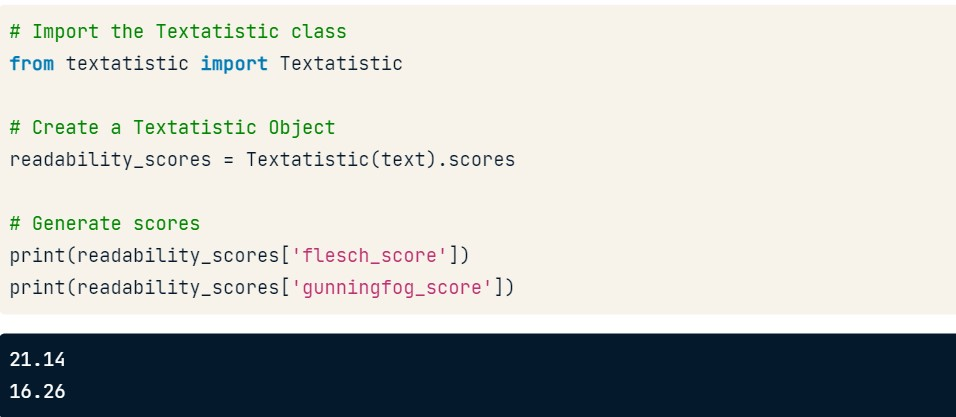

In [24]:
## Hình minh họa Image(fig1, height, width)

In this example, the text that was passed is **between the reading level of a college senior and that of a college graduate**.

In [25]:
!pip install textatistic

### 3.2. PRACTICES
#### Exercise 3.2.1. Readability of 'The Myth of Sisyphus'
In this exercise, you will compute the Flesch reading ease score for `Albert Camus'` famous essay The `Myth of Sisyphus`. 

We will then interpret the value of this score as explained in the theory and try to determine the reading level of the essay.

In [26]:
sisyphus_essay = '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n'

The entire essay is in the form of a string and is available as `sisyphus_essay`.
#### SOLUTION

In [27]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


**Comments.**

Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.

#### Exercise 3.2.2. Readability of various publications
In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.

The excerpts are available as the following strings:
>- `forbes` - An excerpt from an article from Forbes magazine on the Chinese social credit score system.

In [28]:
forbes = '\nThe idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.\n'

>- `harvard_law` - An excerpt from a book review published in Harvard Law Review.

In [29]:
harvard_law = '\nIn his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship. \n'

>- `r_digest` - An excerpt from a Reader's Digest article on flight turbulence.

In [30]:
r_digest = '\nThis week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.\n'

>- `time_kids` - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

In [31]:
time_kids = '\nThat, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.\n'

#### SOLUTION.

In [32]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]
tits = ['Forbes', 'Harvard_Law', 'R_digest', 'Time kids']

# Loop through excerpts and compute gunning fog index
for idx, excerpt in enumerate(excerpts):
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    print('{:35}{:<15}'.format(tits[idx]+"'s Gunning fog index = ", str(gunning_fog)))

Forbes's Gunning fog index =       14.436002482929858
Harvard_Law's Gunning fog index =  20.735401069518716
R_digest's Gunning fog index =     11.085587583148559
Time kids's Gunning fog index =    5.926785009861934


**Comments.**

We are now adept at computing readability scores for various pieces of text. 

- Notice that the `Harvard Law Review` excerpt has the highest `Gunning fog index`; indicating that it can be comprehended only by readers who have graduated college. 
- On the other hand, the `Time for Kids article`, intended for children, has a `much lower fog index` and can be comprehended by `5th grade students`.